In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

In [7]:
boston=load_boston()

In [8]:
boston


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston.target


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
df['output'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,output
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
output     0
dtype: int64

In [96]:
corr_matrix = df.corr()
corr_matrix["output"].sort_values(ascending=False)

output     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: output, dtype: float64

In [21]:
type(boston)

sklearn.utils.Bunch

For 1 feature that is most correlated to the Crime Rate

In [65]:
df1 = df.loc[:,['CRIM','AGE']]  
df1.head()

,CRIM,AGE
0,0.00632,65.2
1,0.02731,78.9
2,0.02729,61.1
3,0.03237,45.8
4,0.06905,54.2


In [66]:
# drop the output column
X = df1.drop('AGE', axis = 1)
# select only the output column and make a copy 
y = df1['AGE'].copy()

In [67]:
type(X)

pandas.core.frame.DataFrame

In [68]:
type(y)

pandas.core.series.Series

In [69]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


In [70]:
regr = linear_model.LinearRegression()

In [71]:
regr.fit(boston_X_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [1.04665093]


In [73]:
boston_y_pred = regr.predict(boston_X_test)

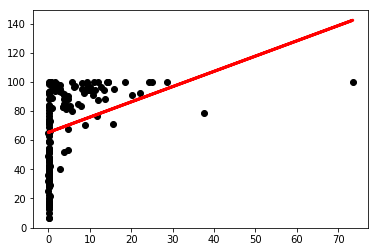

In [74]:
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, boston_y_pred, color='red', linewidth=3)
plt.show()

In [75]:
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

Mean squared error: 670.11


In [76]:
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))

Variance score: 0.16


For 2 features that are most correlated to the Crime rate

In [77]:
df2 = df.loc[:,['CRIM','AGE', 'TAX']]  
df2.head()

,CRIM,AGE,TAX
0,0.00632,65.2,296.0
1,0.02731,78.9,242.0
2,0.02729,61.1,242.0
3,0.03237,45.8,222.0
4,0.06905,54.2,222.0


In [79]:
# drop the output column
X = df2.drop('TAX', axis = 1)
# select only the output column and make a copy 
y = df2['TAX'].copy()

In [80]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size = 0.2, random_state = 38)
print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [81]:
regr = linear_model.LinearRegression()

In [82]:
regr.fit(boston_X_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [8.25004361 2.18312247]


In [88]:
boston_y_pred = regr.predict(boston_X_test)

In [ ]:
plt.scatter(boston_X_test, boston_y_test,  color='black') # This will give Value error because it can not plot the regression including 2 features
plt.plot(boston_X_test, boston_y_pred, color='red', linewidth=3)
plt.show()

In [89]:
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

Mean squared error: 15234.88


In [90]:
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))

Variance score: 0.40
